In [1]:
import sys
sys.path.append('../')
import os 
os.chdir('../')
from Event.Event import Event
from Functions.Event.EventGenerator import EventGenerator
#from Functions.Particles.ParticleTemplate import CalculateMass
#from Functions.Particles.ParticleTemplate import CalculateMassFromChildren
import numpy as np
import matplotlib.pyplot as plt
import mplhep

In [2]:
FileDir = "/import/wu1/atlas/alit6074/Madgraph/Semi-lepton/Events/run_11/tag_1_delphes_events.root"


In [9]:
E = Event()
Limit = 1
ev = EventGenerator(FileDir, Stop = Limit)
ev.EventImplementation = E
ev.SpawnEvents()
ev.CompileEvent(True)

EVENTGENERATOR::INFO::_______NEW DIRECTORY______: /import/wu1/atlas/alit6074/Madgraph/Semi-lepton/Events/run_11
EVENTGENERATOR::INFO::SPAWNING EVENTS IN FILE -> tag_1_delphes_events.root
EVENTCOMPILER::INFO::COMPILING EVENTS FROM FILE -> /import/wu1/atlas/alit6074/Madgraph/Semi-lepton/Events/run_11/tag_1_delphes_events.root
[<Particles.Particles.Particle object at 0x7f97e3bc24f0>, <Particles.Particles.Particle object at 0x7f97e3bc2550>]
[<Particles.Particles.Particle object at 0x7f97e3bc24f0>, <Particles.Particles.Particle object at 0x7f97e3bc2550>]
EVENTCOMPILER::INFO::FINISHED COMPILING EVENTS FROM FILE -> /import/wu1/atlas/alit6074/Madgraph/Semi-lepton/Events/run_11/tag_1_delphes_events.root


In [30]:
def Sort_2 (a,target, Top_Number):  
    if isinstance(a, list):
        for i in a:
            #print(i.Mother1, i.PID, i.Status, i.Index)
            target.Index = Top_Number
            if i not in target.Decay:
                target.Decay.append(i)
            i.Index = Top_Number
            Sort_2(i,target, Top_Number)
        return

                  
    else:
        D1_i = a.Daughter1
        D2_i = a.Daughter2
        Stat = a.Status
        #if abs(a.PID) !=6:
        #    if Stat == 22 or Stat == 23:
        #        a.Index = Top_Number
        #        Fudge.append(a)
        if Stat == 1:
            a.Index = Top_Number
            if a not in Fudge:
                Fudge.append(a)
            #print("END")
        elif D1_i == D2_i:
            if Part_i[D1_i] not in a.Decay:
                a.Decay.append(Part_i[D1_i])
            a.Index = Top_Number
            #print(D1_i, Part_i[D1_i].PID,Part_i[D1_i].Status, Part_i[D1_i].Index)
            return Sort_2(Part_i[D1_i],a, Top_Number)
        elif D1_i != D2_i:
            Soup = Part_i[D1_i:(D2_i+1)]
            a.Index = Top_Number
            #target.Decay.append(Soup)
            
            return Sort_2(Soup,a, Top_Number)
     

In [31]:
event=ev.Events[0]["Delphes"]
Part_i=event.Particle
Tops=[]
IDFK =[]
Fudge = []
Fudge_2=[]
tun = []
for e in range(int(len(Part_i))):
        Target_Top=Part_i[e]
        if Target_Top.PID == 6 and Target_Top.Status == 62:
            Tops= Tops + [Target_Top]
Topp=Tops[0]
ptT=Topp.PT
phiT=Topp.Phi
etaT=Topp.Eta
ET=Topp.E
PxT=ptT*np.cos(phiT)
PyT=ptT*np.sin(phiT)
PzT=ptT*np.sinh(etaT)
Final_Four_T= [ET, PxT, PyT, PzT]
Initial_Mass_T=np.sqrt(Final_Four_T[0]**2-(Final_Four_T[1]**2+Final_Four_T[2]**2 + Final_Four_T[3]**2))

Top_Index = "Top"
Sort_2(Tops[0],Tops[0], Top_Index)
for t in Part_i:
    if t.Index != "Top":
        D1 = t.Daughter1
        D2 = t.Daughter2
        Daughter = Part_i[D1:D2+1]
        IDFK.append(t)
        for g in Daughter:
            if g.Index == "Top" and abs(g.PID) != 6 and t not in tun:
                tun.append(t)
    #if len(t.Decay) != 0:
    #    M1 = t.Mother1
    #    M2 = t.Mother2
    #    Mother = Part_i[M1:M2+1]
    #    for o in Mother:
    #       if len(o.Decay) == 0 and abs(t.PID) != 6 and t not in tun:
    #            tun.append(t)

                
result=[]
result_2=[]
#for q in Fudge:
#    if q not in result:
#        result.append(q)
#for d in tun:
#    if d not in result_2:
#        result_2.append(d)
Combine=[]
Combine_2=[]
for x in Fudge:
    ptf=x.PT
    phif=x.Phi
    etaf=x.Eta
    Ef=x.E
    print( x.PID, x.Status)
    Pxf=ptf*np.cos(phif)
    Pyf=ptf*np.sin(phif)
    Pzf=ptf*np.sinh(etaf)
    Final_Four = [Ef, Pxf, Pyf, Pzf]
    Combine = Combine + [Final_Four]
for u in tun:
    pt2=u.PT
    phi2=u.Phi
    eta2=u.Eta
    E2=u.E
    #print( u.PID, u.Daughter1,Part_i[u.Mother1].PID, u.Status, u.E)
    Px2=pt2*np.cos(phi2)
    Py2=pt2*np.sin(phi2)
    Pz2=pt2*np.sinh(eta2)
    Final_Four_2 = [E2, Px2, Py2, Pz2]
    Combine_2 = Combine_2 +[Final_Four_2]    
Final_Combo=np.sum(Combine, axis=0)
Final_Combo_2=-1*np.sum(Combine_2,axis=0)
Final_Final = np.add(Final_Combo, Final_Combo_2)
Final_Mass=np.sqrt(Final_Final[0]**2 - Final_Final[1]**2 - Final_Final[2]**2 - Final_Final[3]**2)
Diff = Final_Mass - Initial_Mass_T
len(Fudge)

-321 1
22 1
22 1
22 1
22 1
22 1
22 1
211 1
22 1
22 1
2212 1
-2112 1
211 1
-211 1
22 1
22 1
2112 1
-2112 1
130 1
211 1
-211 1
-211 1
211 1
22 1
22 1
22 1
22 1
211 1
-211 1
-211 1
321 1
22 1
22 1
211 1
-211 1
22 1
22 1
-211 1
22 1
22 1
22 1
-13 1
14 1
211 1
-211 1
22 1
22 1
-211 1
22 1
22 1
211 1
211 1
-211 1
-211 1
2212 1
211 1
-211 1
-2112 1
22 1
22 1
211 1
-211 1
22 1
22 1
2112 1
22 1
11 1
-11 1
-2112 1
22 1
11 1
-11 1
22 1
22 1
22 1
22 1
-211 1
22 1
22 1
211 1
22 1
22 1
22 1
22 1
-211 1
2112 1
22 1
22 1
-2112 1
211 1
130 1
22 1
22 1


93

In [113]:
Tops[0].Decay

In [87]:
Truth_Mass = []
Reconstructed_Mass = []
for j in range(int(Limit)):
    event=ev.Events[j]["Delphes"]
    Part_i=event.Particle
    Tops=[]
    for e in range(int(len(Part_i))):
            Target_Top=Part_i[e]
            if abs(Target_Top.PID) == 6 and Target_Top.Status == 62:
                Tops= Tops + [Target_Top]

    T_Mass=[]
    R_Mass = []
    for h in range(int(len(Tops))):
        Fudge = []
        Tops_Index = "Top"
        Anti_Tops_Index = "Anti-Top"
        if Tops[h].PID == 6:
            Top_Index = Tops_Index
        elif Tops[h].PID == -6:
            Top_Index = Anti_Tops_Index
        Topp=Tops[h]
        ptT=Topp.PT
        phiT=Topp.Phi
        etaT=Topp.Eta
        ET=Topp.E
        PxT=ptT*np.cos(phiT)
        PyT=ptT*np.sin(phiT)
        PzT=ptT*np.sinh(etaT)
        Final_Four_T= [ET, PxT, PyT, PzT]
        Initial_Mass_T=np.sqrt(Final_Four_T[0]**2-(Final_Four_T[1]**2+Final_Four_T[2]**2 + Final_Four_T[3]**2))
        Sort_2(Tops[h],Tops[h], Top_Index)
        tun = []
        for t in Part_i:
            if t.Index != Top_Index:
                D1 = t.Daughter1
                D2 = t.Daughter2
                Daughter = Part_i[D1:D2+1]
                for g in Daughter:
                    if g.Index == Top_Index and abs(g.PID) != 6 and t not in tun :
                        tun.append(t)
        Combine=[]
        Combine_2=[]
        for x in Fudge:
            ptf=x.PT
            phif=x.Phi
            etaf=x.Eta
            Ef=x.E
            Pxf=ptf*np.cos(phif)
            Pyf=ptf*np.sin(phif)
            Pzf=ptf*np.sinh(etaf)
            Final_Four = [Ef, Pxf, Pyf, Pzf]
            Combine = Combine + [Final_Four]
        for u in tun: 
            pt2=u.PT
            phi2=u.Phi
            eta2=u.Eta
            E2=u.E
            #print(u.PID, u.Mother1, u.Mother2, u.Daughter1, u.E)
            Px2=pt2*np.cos(phi2)
            Py2=pt2*np.sin(phi2)
            Pz2=pt2*np.sinh(eta2)
            Final_Four_2 = [E2, Px2, Py2, Pz2]
            Combine_2 = Combine_2 +[Final_Four_2]    
        Final_Combo=np.sum(Combine, axis=0)
        Mid_Combo_2 = np.sum(Combine_2,axis=0)
        Final_Combo_2=np.multiply(Mid_Combo_2, -1)
        Final_Final = np.add(Final_Combo, Final_Combo_2)
        Final_Mass=np.sqrt(Final_Final[0]**2 - Final_Final[1]**2 - Final_Final[2]**2 - Final_Final[3]**2)
        Diff = Final_Mass - Initial_Mass_T
        T_Mass = T_Mass + [Initial_Mass_T]
        R_Mass = R_Mass + [Final_Mass]
    Truth_Mass = Truth_Mass + T_Mass
    Reconstructed_Mass = Reconstructed_Mass + R_Mass

In [23]:
def Fuck(l):
    Number = 0
    for i in l:
        print(i.PID)
        Number = Number + 1
        if Number == 1:
            break
        Fuck(i.Decay)
        
        










for j in ev.Events:
    event = ev.Events[j]["Delphes"]
    Fuck(event.Tops)
    
    

6
24
24
24
24
4
4
4
4
421
-321
221
111
22
22
111
22
22
111
211
111
22
22
2212
21
21
21
21
21
421
-321
221
111
22
22
111
22
22
111
211
111
22
22
2212
21
21
421
-321
221
111
22
22
111
22
22
111
211
111
22
22
2212
21
21
21
21
21
421
-321
221
111
22
22
111
22
22
111
211
111
22
22
2212
21
21
21
421
-321
221
111
22
22
111
22
22
111
211
111
22
22
2212
21
21
421
-321
221
111
22
22
111
22
22
111
211
111
22
22
2212
-3
-3
-3
-3
-3
421
-321
221
111
22
22
111
22
22
111
211
111
22
22
2212
21
21
21
21
421
-321
221
111
22
22
111
22
22
111
211
111
22
22
2212
21
21
421
-321
221
111
22
22
111
22
22
111
211
111
22
22
2212
22
22
5
5
5
5
5
5
5
5
5
5
-521
-433
-431
331
211
-211
221
-213
-211
111
22
22
22
411
-13
14
-313
-211
211
113
21
3
3
3
3
3122
2112
111
22
11
-11
-2112
221
21
21
21
21
3122
2112
111
22
11
-11
-2112
221
21
21
3122
2112
111
22
11
-11
-2112
221
21
21
3122
2112
111
22
11
-11
-2112
221
-3
-3
-3
-3
-3
-521
-433
-431
331
211
-211
221
-213
-211
111
22
22
22
411
-13
14
-313
-211
211
113
21
21
-521

Text(0.5, 0, 'Mass (Gev)')

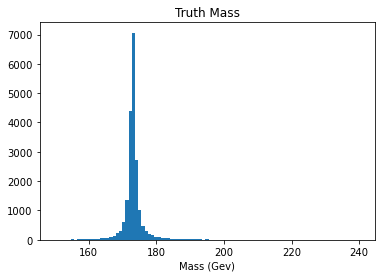

In [88]:
import matplotlib.pyplot as plt
import mplhep
## Plots the results in a histogram
plt.hist(Reconstructed_Mass, 95, range=[150, 240] )
plt.title('Truth Mass')
plt.xlabel('Mass (Gev)')

In [90]:
min(Truth_Mass)

150.90403342379497

In [ ]:

result=[]
result_2=[]
for i in Fudge:
    if i not in result:
        result.append(i)
for d in tun:
    if d not in result_2:
        result_2.append(d)
Combine=[]
Combine_2=[]
for x in result:
    ptf=x.PT
    phif=x.Phi
    etaf=x.Eta
    Ef=x.E
    Pxf=ptf*np.cos(phif)
    Pyf=ptf*np.sin(phif)
    Pzf=ptf*np.sinh(etaf)
    Final_Four = [Ef, Pxf, Pyf, Pzf]
    Combine = Combine + [Final_Four]
for u in result_2:
#u=Part_i[175]
    pt2=u.PT
    phi2=u.Phi
    eta2=u.Eta
    E2=u.E
    Px2=pt2*np.cos(phi2)
    Py2=pt2*np.sin(phi2)
    Pz2=pt2*np.sinh(eta2)
    Final_Four_2 = [E2, Px2, Py2, Pz2]
    Combine_2 = Combine_2 +[Final_Four_2]
Final_Combo=np.sum(Combine, axis=0)
Final_Combo_2=-1*np.sum(Combine_2,axis=0)
Final_Final = np.add(Final_Combo, Final_Combo_2)
Final_Mass=np.sqrt(Final_Final[0]**2-(Final_Final[1]**2+Final_Final[2]**2 + Final_Final[3]**2))
Final_Mass_1=np.sqrt(Final_Combo[0]**2-(Final_Combo[1]**2+Final_Combo[2]**2 + Final_Combo[3]**2))
result_2

In [ ]:
Topp=Tops[0]
ptT=Topp.PT
phiT=Topp.Phi
etaT=Topp.Eta
ET=Topp.E
PxT=ptT*np.cos(phiT)
PyT=ptT*np.sin(phiT)
PzT=ptT*np.sinh(etaT)
Final_Four_T= [ET, PxT, PyT, PzT]
Final_Mass_T=np.sqrt(Final_Four_T[0]**2-(Final_Four_T[1]**2+Final_Four_T[2]**2 + Final_Four_T[3]**2))
Final_Mass_T

In [ ]:
result_2
outsiders=[]
fuck=[]
for p in result:
    Mum1 = p.PID
    outsiders.append(Mum1)
        
    

result_2

In [ ]:
Part_i[175].PID

In [ ]:
Party=[]
for y in result:
    Part=y.PID
    Party= Party + [Part]
Party

In [ ]:
fuck_if_i_know = []
for f in Part_i:
    Mum1 = f.Mother1
    Mum2 = f.Mother2
    if Mum2-Mum1 !=0:
        if len(f.Decay) != 0 and f.Status == 1:
            fuck_if_i_know.append(f)
fuck_if_i_know

In [ ]:
K_plus=Part_i[743]
K_minus=Part_i[1007]
Pi=Part_i[1009]
Final_Particles=[K_plus, K_minus, Pi]
Combine=[]
for i in Final_Particles:
    ptf=i.PT
    phif=i.Phi
    etaf=i.Eta
    Ef=i.E
    Pxf=ptf*np.cos(phif)
    Pyf=ptf*np.sin(phif)
    Pzf=ptf*np.sinh(etaf)
    Final_Four = [Ef, Pxf, Pyf, Pzf]
    Combine = Combine + [Final_Four]
Final_Combo=np.sum(Combine, axis=0)
Final_Mass=np.sqrt(Final_Combo[0]**2-(Final_Combo[1]**2-Final_Combo[2]**2 + Final_Combo[3]**2))
Final_Mass

In [ ]:
Tops[0].Decay[1].Decay[0].Decay[0].Decay[0].Decay[9].PID

In [ ]:
T=Tops[0].Decay[1].Decay[0].Decay[0].Decay[0]
ptt=T.PT
phit=T.Phi
etat=T.Eta
Et=T.E
Pxt=ptt*np.cos(phit)
Pyt=ptt*np.sin(phit)
Pzt=ptt*np.sinh(etat)
Top = [Et, Pxt, Pyt, Pzt]
Mass= np.sqrt(Top[0]**2-(Top[1]**2+Top[2]**2+Top[3]**2))
Decayy=[]
for i in range(len(Tops[0].Decay[1].Decay[0].Decay[0].Decay[0].Decay)):
    Target = Tops[0].Decay[1].Decay[0].Decay[0].Decay[0].Decay[i]
    pt=Target.PT
    phi=Target.Phi
    eta=Target.Eta
    E=Target.E
    Px=pt*np.cos(phi)
    Py=pt*np.sin(phi)
    Pz=pt*np.sinh(eta)
    Four_vector = [E, Px, Py, Pz]
    Decayy = Decayy + [Four_vector]
Top_Vector=np.sum(Decayy, axis=0)
Top_Mass=np.sqrt(Top_Vector[0]**2-(Top_Vector[1]**2+Top_Vector[2]**2+Top_Vector[3]**2))
Top_Mass-Mass


In [ ]:
Tops={}
Tops["Mass_Initial_Level"]=[]
Tops["Mass_Final_Level"]=[]
for y in range(int(Limit)):
    event=ev.Events[y]["Delphes"]
    Final_State={}
    Final_State["4-momentum"]=[]
    Final_State["Mothers"]=[]
    Final_State["Type"]=[]
    Final_State["Daughter1_Early"]=[]
    Final_State["Daughter2_Early"]=[]
    Final_State["Daughter1"]=[]
    Final_State["Daughter2"]=[]
    Final_State["Type_Early"]=[]
    Part_i=event.Particle
    for e in range(int(len(Part_i))):
        Target_Top=Part_i[e]
        if abs(Target_Top.PID) == 6 and Target_Top.Status == 22:
            Top_Inital_Mass=Target_Top.Mass
            Tops["Mass_Initial_Level"].append(Top_Inital_Mass)
    for i in range(int(len(Part_i))):
        Target= Part_i[i]
        if Target.Status == 23:
            pt=Target.PT
            phi=Target.Phi
            eta=Target.Eta
            E=Target.E
            Px=pt*np.cos(phi)
            Py=pt*np.sin(phi)
            Pz=pt*np.sinh(eta)
            Type=Target.PID
            Four_vector=[E,Px,Py,Pz]
            Final_State["4-momentum"].append(Four_vector)
            Final_State["Type"].append(Type)
        elif Target.Status == 52:
            Daughter_1=Target.Daughter1
            Daughter_2=Target.Daughter2
            Type_early=Target.PID
            Final_State["Daughter1_Early"].append(Daughter_1)
            Final_State["Daughter2_Early"].append(Daughter_2)
            Final_State["Type_Early"].append(Type_early)
        elif Target.Status == 22:
            Daughter_1_22=Target.Daughter1
            Daughter_2_22=Target.Daughter2
            Type_early_22=Target.PID
            Final_State["Daughter1_Early"].append(Daughter_1_22)
            Final_State["Daughter2_Early"].append(Daughter_2_22)
            Final_State["Type_Early"].append(Type_early_22)
        elif Target.Status == 51:
            Daughter_1_51=Target.Daughter1
            Daughter_2_51=Target.Daughter2
            Type_early_51=Target.PID
            Final_State["Daughter1_Early"].append(Daughter_1_51)
            Final_State["Daughter2_Early"].append(Daughter_2_51)
            Final_State["Type_Early"].append(Type_early_51)
    for k in range(int(len(Final_State["Daughter1_Early"]))):
        if Final_State["Daughter1_Early"][k] != Final_State["Daughter2_Early"][k] and abs(Final_State["Type_Early"][k])== 24:
                Final_State["Daughter1"].append(Final_State["Daughter1_Early"][k])
                Final_State["Daughter2"].append(Final_State["Daughter2_Early"][k])
    for j in range(int(len(Final_State["Daughter1"]))): 
        for h in range(int(len(Part_i))):
            if h == (Final_State["Daughter1"][j]):
                Target_child=Part_i[h]
                if Target_child.Status == 1 and abs(Target_child.PID) < 15:
                    pt_lep=Target_child.PT
                    phi_lep=Target_child.Phi
                    eta_lep=Target_child.Eta
                    E_lep=Target_child.E
                    Px_lep=pt_lep*np.cos(phi_lep)
                    Py_lep=pt_lep*np.sin(phi_lep)
                    Pz_lep=pt_lep*np.sinh(eta_lep)
                    Type_lep=Target_child.PID
                    Four_vector_lep=[E_lep,Px_lep,Py_lep,Pz_lep]
                    Final_State["4-momentum"].append(Four_vector_lep)
                    Final_State["Type"].append(Type_lep)
            elif h == (Final_State["Daughter2"][j]):
                Target_child_2=Part_i[h]
                if Target_child_2.Status == 1 and abs(Target_child_2.PID) < 15:
                    pt_lep_2=Target_child_2.PT
                    phi_lep_2=Target_child_2.Phi
                    eta_lep_2=Target_child_2.Eta
                    E_lep_2=Target_child_2.E
                    Px_lep_2=pt_lep_2*np.cos(phi_lep_2)
                    Py_lep_2=pt_lep_2*np.sin(phi_lep_2)
                    Pz_lep_2=pt_lep_2*np.sinh(eta_lep_2)
                    Type_lep_2=Target_child_2.PID
                    Four_vector_lep_2=[E_lep_2,Px_lep_2,Py_lep_2,Pz_lep_2]
                    Final_State["4-momentum"].append(Four_vector_lep_2)
                    Final_State["Type"].append(Type_lep_2)
    Top=[]
    Anti_Top=[]
    for x in range(int(len(Final_State["4-momentum"]))):
        #Bottom
        if Final_State["Type"][x] == 5:
            Top= Top + [Final_State["4-momentum"][x]]
        elif Final_State["Type"][x] == -5:    
            Anti_Top= Anti_Top + [Final_State["4-momentum"][x]]
        #Charm
        elif Final_State["Type"][x] == 4:
            Top= Top + [Final_State["4-momentum"][x]]
        elif Final_State["Type"][x] == -4: 
            Anti_Top= Anti_Top + [Final_State["4-momentum"][x]]
        #Strange
        elif Final_State["Type"][x] == -3:
            Top= Top + [Final_State["4-momentum"][x]]
        elif Final_State["Type"][x] == 3:
            Anti_Top= Anti_Top + [Final_State["4-momentum"][x]]
        #Up
        elif Final_State["Type"][x] == 2:
            Top= Top + [Final_State["4-momentum"][x]]
        elif Final_State["Type"][x] == -2: 
            Anti_Top= Anti_Top + [Final_State["4-momentum"][x]]
        #Down
        elif Final_State["Type"][x] == -1:
            Top= Top + [Final_State["4-momentum"][x]]
        elif Final_State["Type"][x] == 1: 
            Anti_Top= Anti_Top + [Final_State["4-momentum"][x]]

        #Electron
        elif Final_State["Type"][x] == -11:
            Top= Top + [Final_State["4-momentum"][x]]
        elif Final_State["Type"][x] == 11: 
            Anti_Top= Anti_Top + [Final_State["4-momentum"][x]]
        #e_neutrino
        elif Final_State["Type"][x] == 12:
            Top= Top + [Final_State["4-momentum"][x]]
        elif Final_State["Type"][x] == -12: 
            Anti_Top= Anti_Top + [Final_State["4-momentum"][x]]
        #Muon
        elif Final_State["Type"][x] == -13:
            Top= Top + [Final_State["4-momentum"][x]]
        elif Final_State["Type"][x] == 13: 
            Anti_Top= Anti_Top + [Final_State["4-momentum"][x]]
        #mu_neutrino
        elif Final_State["Type"][x] == 14:
            Top= Top + [Final_State["4-momentum"][x]]
        elif Final_State["Type"][x] == -14: 
            Anti_Top= Anti_Top + [Final_State["4-momentum"][x]]

    Top_Vector_1=np.sum(Top, axis=0)
    Top_Mass_1=np.sqrt(Top_Vector_1[0]**2-(Top_Vector_1[1]**2+Top_Vector_1[2]**2+Top_Vector_1[3]**2))
    Tops["Mass_Final_Level"].append(Top_Mass_1)
    Top_Vector_2=np.sum(Anti_Top, axis=0)
    Top_Mass_2=np.sqrt(Top_Vector_2[0]**2-(Top_Vector_2[1]**2+Top_Vector_2[2]**2+Top_Vector_2[3]**2))
    Tops["Mass_Final_Level"].append(Top_Mass_2)

In [ ]:
Tops["Mass_Final_Level"]

In [ ]:
plt.hist(Tops["Mass_Initial_Level"], 95)
plt.title('Truth Masses')
plt.xlabel('Mass (Gev)')

In [ ]:
d=[]
for t in range(int(len(Tops["Mass_Final_Level"]))):
    if Tops["Mass_Final_Level"][t] < 100:
            d= d +[t]
d